In [1]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())

In [2]:
def get_rl_plots(file_path: str=None):
    # Import the data
    if file_path is None:
        file_path = "./results/rl/test_case.csv"

    data = []

    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            # Just get the second row
            if reader.line_num != 2:
                continue

            # For every list in the row split it into floats by comma
            for i in range(len(row)):
                raw_data = row[i].split(',')
                num_data = []
                for j in range(len(raw_data)):
                    # Remove the brackets from the first and last element
                    if j == 0:
                        raw_data[j] = raw_data[j][1:]
                    elif j == len(raw_data) - 1:
                        raw_data[j] = raw_data[j][:-1]
                    num_data.append(float(raw_data[j]))
                data.append(num_data)

    # Convert to numpy array
    data = np.array(data)

    # Extract statistics
    reward_history_rl = data.T
    best_reward_rl = np.max(reward_history_rl, axis=0)
    mean_reward_rl = np.mean(reward_history_rl, axis=0)
    std_reward_rl = np.std(reward_history_rl, axis=0) / np.sqrt(reward_history_rl.shape[0])

    # Rolling mean on the best reward
    rolling_mean_rl = np.zeros_like(best_reward_rl)
    for i in range(len(best_reward_rl)):
        rolling_mean_rl[i] = np.mean(best_reward_rl[max(0, i-20):i+1])

    return best_reward_rl, rolling_mean_rl

In [3]:
def get_ea_plots(file_name: str=None):
    # Import the data
    if file_name is None:
        file_name = "./results/ea/test_case.csv"

    data = []

    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(float(row[0]))

    # Convert to numpy array
    data = np.array(data)

    # Extract statistics
    best_reward_ea = data

    # Rolling mean on the best reward
    rolling_mean_ea = np.zeros_like(best_reward_ea)
    for i in range(len(best_reward_ea)):
        rolling_mean_ea[i] = np.mean(best_reward_ea[max(0, i-20):i+1])

    return best_reward_ea, rolling_mean_ea

In [4]:
# RL files
rl_test = "./results/rl/test_case.csv"
rl_alt = "./results/rl/alternating.csv"
rl_alt_noise = "./results/rl/alternating_noise.csv"

# EA files
ea_test = "./results/ea/test_case.csv"
ea_test_learn = "./results/ea/test_case_learning.csv"
ea_alt = "./results/ea/alternating.csv"
ea_alt_noise = "./results/ea/alternating_noise.csv"

In [5]:
# Get RL plots
rt_br, rt_rm = get_rl_plots(rl_test)
ra_br, ra_rm = get_rl_plots(rl_alt)
ran_br,ran_rm = get_rl_plots(rl_alt_noise)

# Get EA plots
et_br, et_rm = get_ea_plots(ea_test)
ea_br, ea_rm = get_ea_plots(ea_alt)
ean_br, ean_rm = get_ea_plots(ea_alt_noise)

In [27]:
# Test case learning EA
# Different file saved so need to import separately
data = []

with open(ea_test_learn, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for i in range(len(row)):
            # Remove the brackets from the first and last element
            if i == 0:
                row[i] = row[i][1:]
            elif i == len(row) - 1:
                row[i] = row[i][:-1]
            data.append(float(row[i]))

# Extract statistics
# Remove the first few samples in 5th row of the csv, as bad initialisation
etl_br = data[:571] + data[691:]
etl_br = np.array(etl_br)

# Rolling mean on the best reward
etl_rm = np.zeros_like(etl_br)
for i in range(len(etl_br)):
    etl_rm[i] = np.mean(etl_br[max(0, i-20):i+1])

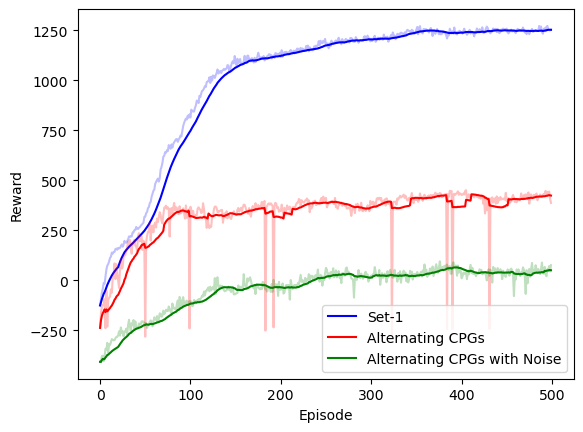

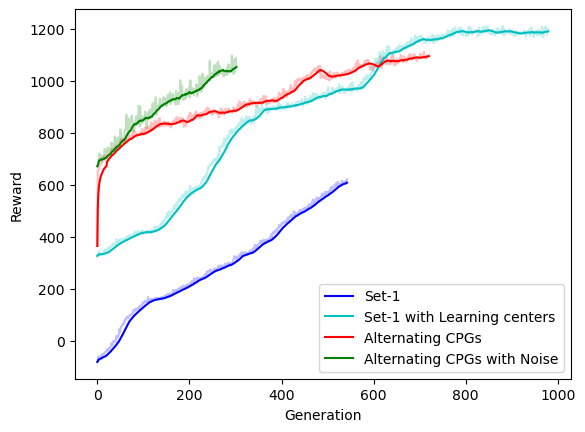

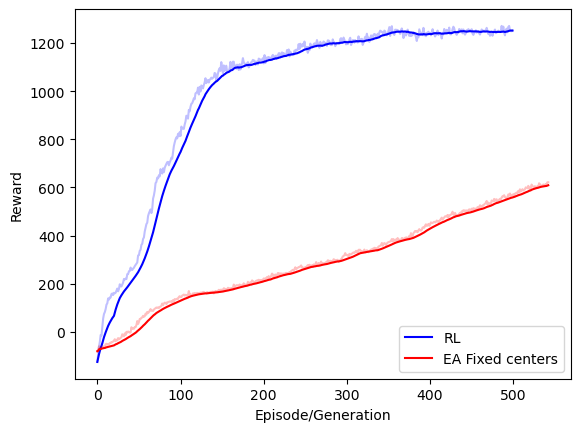

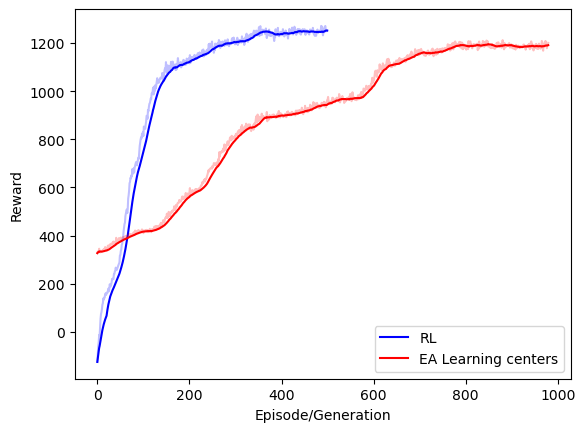

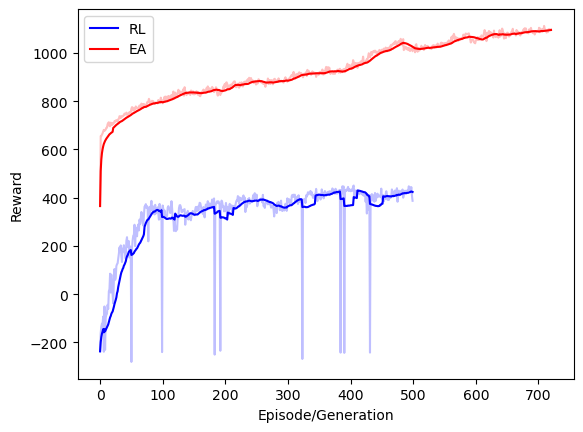

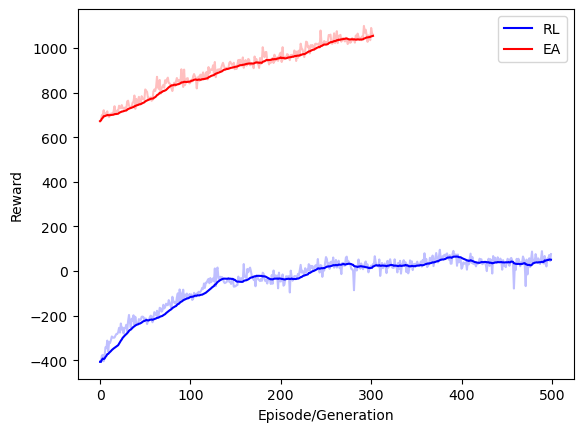

In [36]:
## Plot the results case-wise

alpha = 0.25

# All cases for RL
plt.figure("All cases RL")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rt_br, 'b', alpha=alpha)
plt.plot(rt_rm, 'b', label="Set-1")
plt.plot(ra_br, 'r', alpha=alpha)
plt.plot(ra_rm, 'r', label="Alternating CPGs")
plt.plot(ran_br, 'g', alpha=alpha)
plt.plot(ran_rm, 'g', label="Alternating CPGs with Noise")
plt.legend()
plt.savefig("./results/figures/all_rl.png")

# All cases for EA
plt.figure("All cases EA")
plt.xlabel("Generation")
plt.ylabel("Reward")
plt.plot(et_br, 'b', alpha=alpha)
plt.plot(et_rm, 'b', label="Set-1")
plt.plot(ea_br, 'r', alpha=alpha)
plt.plot(etl_br, 'c', alpha=alpha)
plt.plot(etl_rm, 'c', label="Set-1 with Learning centers")
plt.plot(ea_rm, 'r', label="Alternating CPGs")
plt.plot(ean_br, 'g', alpha=alpha)
plt.plot(ean_rm, 'g', label="Alternating CPGs with Noise")
plt.legend()
plt.savefig("./results/figures/all_ea.png")

# Test case RL vs EA fixed
plt.figure("Test Case RL vs EA")
plt.xlabel("Episode/Generation")
plt.ylabel("Reward")
plt.plot(rt_br, 'b', alpha=alpha)
plt.plot(rt_rm, 'b', label="RL")
plt.plot(et_br, 'r', alpha=alpha)
plt.plot(et_rm, 'r', label="EA Fixed centers")
plt.legend()
plt.savefig("./results/figures/test_case_ref.png")

# Test case RL vs EA learning
plt.figure("Test Case RL vs EA Learning")
plt.xlabel("Episode/Generation")
plt.ylabel("Reward")
plt.plot(rt_br, 'b', alpha=alpha)
plt.plot(rt_rm, 'b', label="RL")
plt.plot(etl_br, 'r', alpha=alpha)
plt.plot(etl_rm, 'r', label="EA Learning centers")
plt.legend()
plt.savefig("./results/figures/test_case_rel.png")

# Alternating RL vs EA
plt.figure("Alternating RL vs EA")
plt.xlabel("Episode/Generation")
plt.ylabel("Reward")
plt.plot(ra_br, 'b', alpha=alpha)
plt.plot(ra_rm, 'b', label="RL")
plt.plot(ea_br, 'r', alpha=alpha)
plt.plot(ea_rm, 'r', label="EA")
plt.legend()
plt.savefig("./results/figures/alt_re.png")

# Alternating and Noise RL vs EA
plt.figure("Alternating and Noise RL vs EA")
plt.xlabel("Episode/Generation")
plt.ylabel("Reward")
plt.plot(ran_br, 'b', alpha=alpha)
plt.plot(ran_rm, 'b', label="RL")
plt.plot(ean_br, 'r', alpha=alpha)
plt.plot(ean_rm, 'r', label="EA")
plt.legend()
plt.savefig("./results/figures/alt_noise_re.png")

plt.show()